# AIRLINE FLIGHT PRICE PREDICTION 


## Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', 35)

## Load the dataset:

In [2]:
train_data = pd.read_excel(r"C:\Users\Ruchita\Desktop\vidula\ML_PROJECTS\Airline Flight Prediction\Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Handling Missing Values: 

In [3]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
train_data.shape

(10683, 11)

1. Rows: 10683
2. Columns: 11

In [5]:
train_data.dropna(inplace = True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Change the data types of the Date columns:

In [7]:
def change_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [8]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_datetime(i)

In [9]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null datetime64[ns]
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null datetime64[ns]
Arrival_Time       10682 non-null datetime64[ns]
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


### Deriving Journey Month and Journey Day columns:

In [10]:
train_data['journey_day']= train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-02-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-14 05:50:00,2021-02-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-02-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-02-14 18:05:00,2021-02-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-02-14 16:50:00,2021-02-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [11]:
train_data.drop('Date_of_Journey', axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-02-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-14 05:50:00,2021-02-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-02-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-02-14 18:05:00,2021-02-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-02-14 16:50:00,2021-02-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


### Extract Hour, Minutes from the 'Date' columns:

In [12]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_min(df, col):
    df[col+'_minute'] = df[col].dt.minute
    
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)
        

In [13]:
extract_hour(train_data, 'Dep_Time')
extract_min(train_data, 'Dep_Time')
drop_column(train_data,'Dep_Time')

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-02-14 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-02-14 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [15]:
extract_hour(train_data, 'Arrival_Time')
extract_min(train_data, 'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### Correct format for Hours and Minutes:

In [17]:
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]= duration[i]+' 0m'
        else:
            duration[i]= '0h ' + duration[i]
            
            

In [18]:
train_data['Duration']= duration
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [19]:
## '2h 50m'.split(' ')[1][0:-1]

'50'

### Derive Durations Hours and Minutes features:

In [20]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [21]:
def minute(x):
    return x.split(' ')[1][0:-1]

In [22]:
train_data['durations_hours'] = train_data['Duration'].apply(hour)
train_data['durations_min'] = train_data['Duration'].apply(minute)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,durations_hours,durations_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
drop_column(train_data, 'Duration')

In [24]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'durations_hours', 'durations_min'],
      dtype='object')

In [25]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
durations_hours        object
durations_min          object
dtype: object

### Change the datatypes of the Hours and Minutes columns:

In [26]:
train_data['durations_hours']=  train_data['durations_hours'].astype(int)
train_data['durations_min']=  train_data['durations_min'].astype(int)


In [27]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
durations_hours         int32
durations_min           int32
dtype: object

### Separating Categorical and Numerical Columns:

In [28]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [29]:
num_col = [col for col in train_data.columns if train_data[col].dtype != 'object']
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'durations_hours',
 'durations_min']

### Categorical Data Frame:

In [30]:
#nominal data --- one hot 
#ordinal data - label encoder

In [31]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [32]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## BOXPLOT: Types of Airlines and thier Prices.

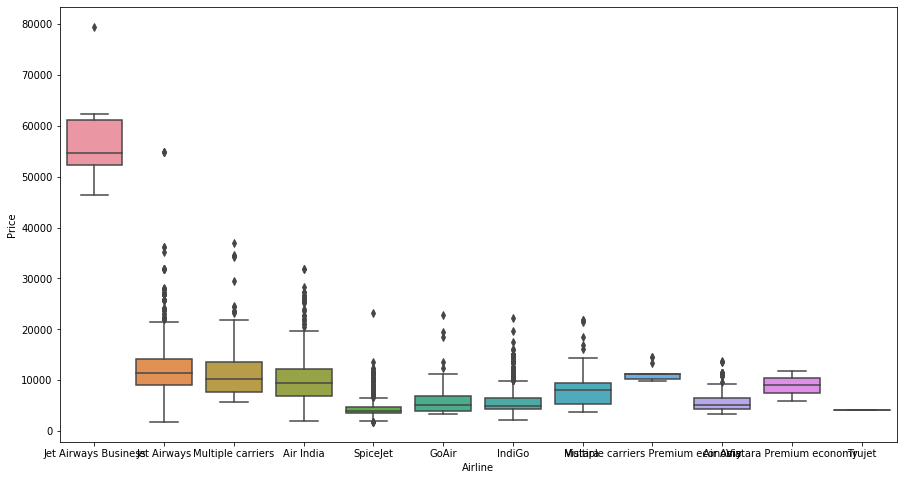

In [33]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Airline', y='Price', data = train_data.sort_values('Price', ascending = False))


#### Insight:  JetAirways has highest price

## BOXPLOT: Stops and prices

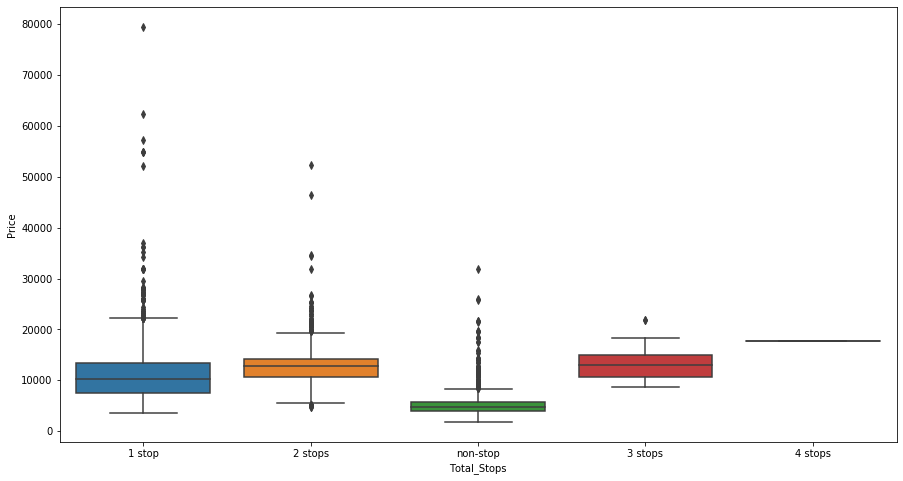

In [35]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Total_Stops', y='Price', data = train_data.sort_values('Price', ascending = False))


#### Insight: flights with 1 stop has outliers


## BARPLOT: Source of the Flight and Prices

In [37]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

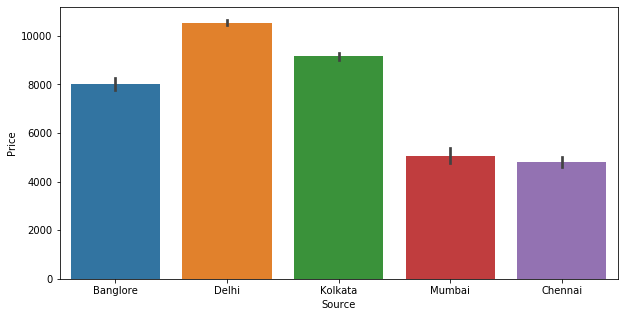

In [38]:
plt.figure(figsize = (10,5))
sns.barplot(x='Source', y='Price', data = train_data.sort_values('Price', ascending = False))
plt.show()

## BARPLOT: Destination of the Flight and Prices

In [39]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

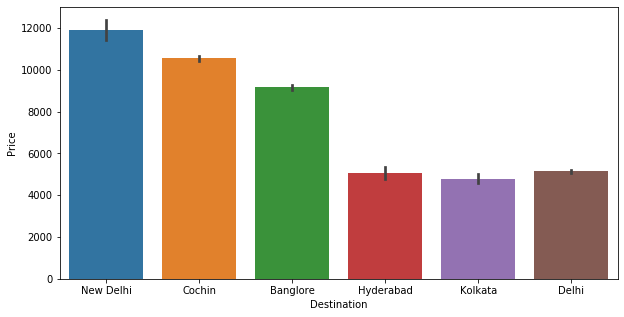

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(x='Destination', y='Price', data = train_data.sort_values('Price', ascending = False))
plt.show()

### Separating the Routes for each record.

In [41]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

In [42]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [43]:
drop_column(categorical, 'Route')

In [44]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [45]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [46]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace = True)

In [47]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [48]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


## LABEL ENCODER:

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
en = LabelEncoder()

In [51]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i] = en.fit_transform(categorical[i])

In [52]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


## Drop unnecessary features:

In [53]:
drop_column(categorical, 'Additional_Info')

### Mapping the Stops with corresponding number:

In [54]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [56]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


## Dummy Variables:

In [58]:
col =['Airline','Source','Destination']
dummy_data =pd.get_dummies(categorical[col], drop_first=True)
dummy_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
new_train = pd.concat([categorical, dummy_data, train_data[num_col]], axis =1)
new_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,durations_hours,durations_min
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [60]:
drop_column(new_train,'Airline')
drop_column(new_train,'Source')
drop_column(new_train,'Destination')

In [61]:
new_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,durations_hours,durations_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [62]:
new_train.shape


(10682, 35)

## Handling Outliers for Target column:

In [63]:
def plot(df, col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(df[col],ax= ax1)
    sns.boxplot(df[col], ax= ax2)
    

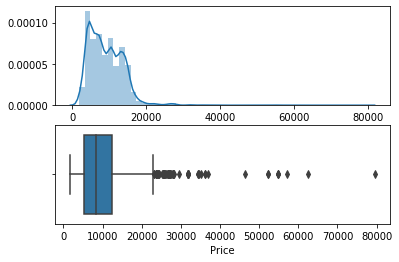

In [64]:
plot(new_train, 'Price')

In [65]:
new_train['Price']= np.where(new_train['Price'] >= 40000, new_train['Price'].median(),new_train['Price'])

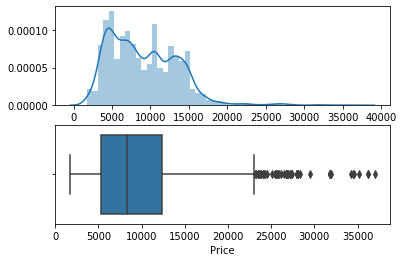

In [66]:
plot(new_train, 'Price')

## Separate the target and independant variables:

In [68]:
X = new_train.drop('Price', axis = 1)
y = new_train['Price']

## Feature Selection :

In [70]:
from sklearn.feature_selection import mutual_info_classif

In [71]:
mutual_info_classif(X,y)

array([2.16332887, 2.04563748, 2.8007014 , 2.27120804, 1.4948481 ,
       0.7592564 , 0.76985347, 0.0922921 , 0.67462365, 0.93718787,
       0.00352545, 0.59165689, 0.01797063, 0.31578332, 0.00550445,
       0.2176093 , 0.01294346, 0.1652412 , 1.57899375, 0.88600856,
       0.31021921, 1.53943199, 0.39759462, 0.30341393, 0.17146003,
       0.3742132 , 1.081897  , 0.84407457, 1.44998891, 1.20786735,
       1.85235223, 1.54128444, 1.806579  , 1.07439411])

In [72]:
imp_data = pd.DataFrame(mutual_info_classif(X,y), index = X.columns)
imp_data

,0
Total_Stops,2.181745
Route_1,2.045282
Route_2,2.803775
Route_3,2.306391
Route_4,1.461484
Route_5,0.709365
Airline_Air India,0.745117
Airline_GoAir,0.083002
Airline_IndiGo,0.667282
Airline_Jet Airways,0.899269


In [73]:
imp_data.columns=['importance']
imp_data.sort_values(by='importance',ascending=False)

,importance
Route_2,2.803775
Route_3,2.306391
Total_Stops,2.181745
Route_1,2.045282
Arrival_Time_hour,1.847046
durations_hours,1.794380
Destination_Cochin,1.567520
Source_Delhi,1.547117
Arrival_Time_minute,1.515942
Dep_Time_hour,1.469414


## Apply Machine Learning algo to the data:

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [81]:
from sklearn import metrics
import pickle
def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print('Training score: {}'.format(model.score(X_train, y_train)))
    predictions = model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    print('\n')
    r2_score = metrics.r2_score(y_test, predictions)
    print('r2 score is : {}'.format(r2_score))
    
    
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
    sns.distplot(y_test - predictions)
    
    if dump == 1:
        file = open(r'C:\Users\Ruchita\Desktop\vidula\ML_PROJECTS\Airline Flight Prediction/model.pkl','wb')
        pickle.dump(model, file)

### RANDOM FOREST REGRESSOR:

In [82]:
from sklearn.ensemble import RandomForestRegressor

Training score: 0.953762018728724
Predictions are: [ 8470.3      4171.37     6008.60375 ...  7575.27     6161.17
 13061.84   ]


r2 score is : 0.8125081544322243
MAE: 1135.4713314400074
MSE: 3622706.667359179
RMSE: 1903.3409225252262


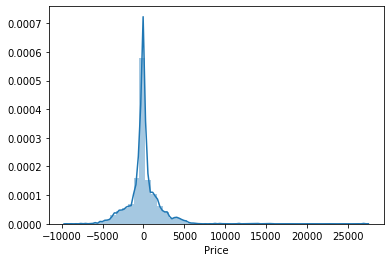

In [83]:
predict(RandomForestRegressor(),1)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### LINEAR REGRESSION:

Training score: 0.6133296905474774
Predictions are: [9609.38871719 5778.41656598 6213.96034468 ... 8996.16802745 7790.05237985
 8814.92662381]


r2 score is : 0.6252325913915608
MAE: 1926.7892830217163
MSE: 7241234.336156425
RMSE: 2690.954168349291


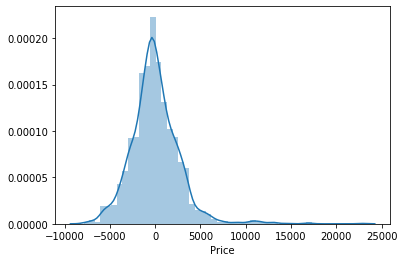

In [85]:
predict(LinearRegression(),0)


### DECISION TREE REGRESSOR:

Training score: 0.9667220148167153
Predictions are: [ 8610.  4145.  5678. ...  6902.  5894. 12351.]


r2 score is : 0.7184190780534543
MAE: 1318.8357744501636
MSE: 5440690.395082541
RMSE: 2332.528755467452


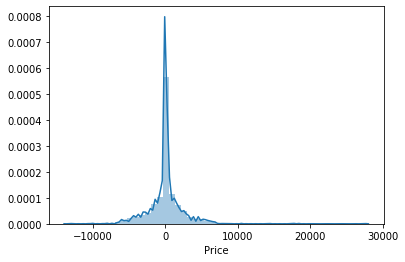

In [87]:
predict(DecisionTreeRegressor(),0)

### KNN REGRESSOR:

Training score: 0.7842308958146187
Predictions are: [ 8400.   4329.   6349.6 ... 11722.6 10152.4 16906.8]


r2 score is : 0.6579266918744096
MAE: 1687.2726251754798
MSE: 6609520.805128686
RMSE: 2570.898832145809


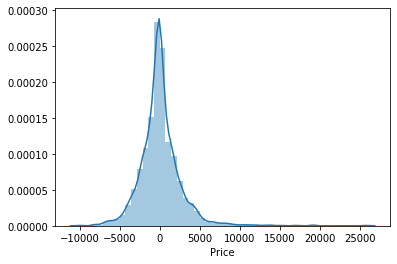

In [88]:
predict(KNeighborsRegressor(),0)

## HyperTuning the parameters:

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
reg_rf = RandomForestRegressor()

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
n_estimators = [int(x) for x in np.linspace(start =100, stop=1200,num=6)]
max_depth  = [int(x) for x in np.linspace(start =5, stop=30,num=4)]

In [94]:
random_grid ={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
    
}

In [97]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, cv =3,verbose = 2, n_jobs =-1)

In [98]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [100]:
predictions = rf_random.predict(X_test)


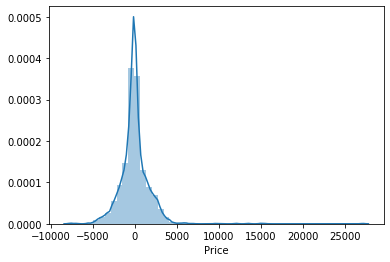

In [101]:
sns.distplot(y_test - predictions)

In [102]:
metrics.r2_score(y_test, predictions)

0.8422167191237362

In [103]:
file = open(r'C:\Users\Ruchita\Desktop\vidula\ML_PROJECTS\Airline Flight Prediction/rf_random.pkl','wb')


In [104]:
pickle.dump(rf_random, file)

In [106]:
model = open(r'C:\Users\Ruchita\Desktop\vidula\ML_PROJECTS\Airline Flight Prediction/model.pkl','rb')
forest = pickle.load(model)

In [108]:
predictions2 = forest.predict(X_test)

In [109]:
metrics.r2_score(y_test, predictions2)

0.8125081544322243